In [1]:
import os
import json
import glob
import shutil
from math import dist
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from typing import Union
from matplotlib.font_manager import FontProperties

sys.path.append(os.path.abspath("../code_base"))
from _info_ import ear_types, degrees, acupoints_name, cm
from _common_ import angles
from fig import errors
# from ..code_base._info_ import ear_types, degrees, acupoints_name, cm
# from ..code_base._common_ import angles

In [2]:
# class occlusion_errors():
#     def __init__(self):
#         self.occluded_result = "../occluded_result"

#     def read_error_csv(self, fpath1):
#         df_np = pd.read_csv(fpath1, index_col = 0).to_numpy()
#         return df_np

#     def wrap_err_for_each_acu(self):
#         result = {}
#         for ear_type in ear_types:
#             result[ear_type] = []
#             for deg in degrees:
#                 deg_err = []
#                 names = os.listdir(os.path.join(self.occluded_result, ear_type))
#                 for i in range(4):
#                     angles_err = []
#                     for name in names:
#                         indexes = os.listdir(os.path.join(self.occluded_result, ear_type, name, "error", deg))
#                         indexes = sorted(indexes, key = lambda index: int(index))
#                         csv_pth = os.path.join(self.occluded_result, ear_type, name, "error", deg, indexes[i], "error.csv")
#                         error_np = self.read_error_csv(csv_pth)
#                         angles_err.append(error_np)
#                     angles_err = np.vstack(angles_err)
#                     deg_err.append(angles_err)
#                 result[ear_type].append(deg_err)             #shape = (subjects, degrees, angles, acupoints)

#         return result
    

#     def wrap_err_for_each_subject(self):
#         result = {}
#         for ear_type in ear_types:
#             result[ear_type] = []
#             for deg in degrees:
#                 deg_err = []
#                 names = os.listdir(os.path.join(self.occluded_result, ear_type))
#                 for i in range(4):
#                     angles_err = []
#                     for name in names:
#                         indexes = os.listdir(os.path.join(self.occluded_result, ear_type, name, "error", deg))
#                         indexes = sorted(indexes, key = lambda index: int(index))
#                         csv_pth = os.path.join(self.occluded_result, ear_type, name, "error", deg, indexes[i], "error.csv")
#                         error_np = self.read_error_csv(csv_pth)
#                         angles_err.append(error_np)
#                     deg_err.append(angles_err)
#                 result[ear_type].append(deg_err)             #shape = (subjects, degrees, angles, acupoints)
#             print(len(result[ear_type][0]))
#             print(len(result[ear_type][0][0]))
            
#             print(len(result[ear_type][0][0][0]))
#         return result 
      

In [2]:
class occlusion_errors():
    def __init__(self):
        self.occluded_result = "../occluded_result"
        
    def read_error_csv(self, fpath1):
        error_np = pd.read_csv(fpath1, index_col = 0).to_numpy()
        return error_np

    def wrap_err_from_csv(self):
        result = {}
        for ear_type in ear_types:
            result[ear_type] = []
            names = os.listdir(os.path.join(self.occluded_result, ear_type))
            for name in names:
                deg_err = []
                for deg in degrees:
                    angles_err = []
                    
                    csv_pth = os.path.join(self.occluded_result, ear_type, name, "error", deg, "error.csv")
                    error_np = self.read_error_csv(csv_pth)
                    deg_err.append(error_np)
                result[ear_type].append(deg_err)             #shape = (subjects, degrees, angles, acupoints)           
            print(np.array(result[ear_type]).shape)
        return result

In [10]:
A = occlusion_errors()
print(A.wrap_err_from_csv())

(8, 6, 4, 21)
(5, 6, 4, 14)
{'free': [[array([[0.1903326 , 0.10835793, 0.09094957, 0.1865343 , 0.03834761,
        0.2096259 , 0.16634391, 0.18651352, 0.23482302, 0.32599181,
        0.27902957, 0.12808293, 0.51929968, 0.28230376, 0.16559627,
        0.06688812, 0.08504294, 0.19281281, 0.10624651, 0.11167819,
        0.18759354],
       [0.18770967, 0.13021096, 0.09137619, 0.18783705, 0.03924037,
        0.19849754, 0.1468731 , 0.18623433, 0.22112762, 0.32187771,
        0.26942166, 0.13243182, 0.47639191, 0.28557245, 0.16102762,
        0.05307386, 0.09291921, 0.20048302, 0.11301656, 0.10988945,
        0.20484885],
       [0.19381346, 0.15109283, 0.07685833, 0.17655471, 0.0398111 ,
        0.16795856, 0.1293986 , 0.17571927, 0.20724813, 0.28587676,
        0.26530402, 0.15413538, 0.43590321, 0.2827825 , 0.1469242 ,
        0.04969492, 0.08373713, 0.18239926, 0.09389424, 0.09795336,
        0.18620784],
       [0.1789516 , 0.17684304, 0.08726329, 0.1723198 , 0.0343461 ,
        0.1391

In [26]:
class plot_fig():
    def __init__(self, errors: Union[dict, list]):
        self.wrapped_errors = errors
        self.occluded_result = "../occluded_result" 
        
    def unwrapped_to_CDF(self, wrapped_errors_dict):
        CDF = {}
        for ear_type in ear_types:
            CDF[ear_type]= {}
            total = np.array(wrapped_errors_dict[ear_type])
            total = total.reshape(-1)
            
            sorted_error = np.sort(total*10)
            cumulative_prob = np.arange(1, len(total) + 1) / len(total)
            
            CDF[ear_type]["sorted_error"] = sorted_error
            CDF[ear_type]["cumulative_prob"] = cumulative_prob
            
        return CDF
    
    def occlusion_unwrapped_to_CDF(self, wrapped_errors_dict):
        CDF = {}
        for ear_type in ear_types:
            CDF[ear_type]= {}
            total = []
            for i in range(0, len(degrees)):
                temp = []
                for j in range(4):
                    
                    total.append(wrapped_errors_dict[ear_type][i][j])         
            total = np.vstack(total)
            total = total.reshape(-1)

            sorted_error = np.sort(total*10)
            cumulative_prob = np.arange(1, len(total) + 1) / len(total)

            CDF[ear_type]["sorted_error"] = sorted_error
            CDF[ear_type]["cumulative_prob"] = cumulative_prob
            
        return CDF
        
    def CDF_fig(self, title, label):
        if isinstance(self.wrapped_errors, dict):
            CDF = self.unwrapped_to_CDF(self.wrapped_errors)
            for ear_type in ear_types: 

                plt.plot(CDF[ear_type]["sorted_error"], CDF[ear_type]["cumulative_prob"], label = label)
                plt.xlim(0, 10)
                plt.ylim(0, 1.1)
                plt.xlabel("mm")
                plt.ylabel("Probability")
                plt.title(title)
                plt.legend()
                plt.show()
        elif isinstance(self.wrapped_errors, list):
            for ear_type in ear_types:
                for i in range(0, len(self.wrapped_errors)):
                    CDF = self.unwrapped_to_CDF(self.wrapped_errors[i])
                    plt.plot(CDF[ear_type]["sorted_error"], CDF[ear_type]["cumulative_prob"], label = label[i])
                plt.xlim(0, 10)
                plt.ylim(0, 1.1)
                plt.xlabel("mm")
                plt.ylabel("Probability")
                plt.title(title)
                plt.legend()
                plt.show()

        else:
            raise ValueError("Unsupported type")
    def bar_fig(self, label, plot_type = "acupoints"):
        
        if isinstance(self.wrapped_errors, dict):
            if plot_type == "acupoints":
                permute_dim = (1, 2, 3, 0)
                title = "Acupoint localization error"
            else:
                permute_dim = (1, 2, 0, 3)
                title = "Acupoint localization error on different subjects"
            for ear_type in ear_types:
                x = np.transpose(self.wrapped_errors[ear_type], permute_dim)*10
                means = np.nanmean(x, axis = 3)
                stds = np.nanstd(x, axis = 3)
                if plot_type == "acupoints":
                    tick_label = acupoints_name[:x.shape[2]]
                else:
                    tick_label = ["Subject"+str(x) for x in list(range(0 , x.shape[2]))]
                
                for i in range(0, len(x)):
                    plt.figure(figsize=(15,10))
                    for j in range(0 ,len(x[0])):

                        plt.bar(np.arange(x.shape[2]) + j*0.2, means[i][j], yerr=stds[i][j], align='center', label = '{index} degrees'.format(index = 0 + 10*j), ecolor='black', capsize=3, width=0.2)

                    plt.ylabel('mm' , fontsize = 30, labelpad = 50, rotation = 0)

                    plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 

                    font_path = r'C:\Windows\Fonts\msjhl.ttc'
                    font = FontProperties(fname=font_path, size=12)
                    
                    plt.xticks(np.arange(x.shape[2]) + 0.3, tick_label, fontsize=12, rotation=-45, ha='center')
         
                    plt.yticks(fontsize=30)
                    plt.title(title, fontsize = 30, pad = 20)

                    plt.legend(fontsize=17, ncol = 1, loc = (1.001,0))

                    plt.tight_layout()

                    if not os.path.isdir(os.path.join(traditional_inpainting, ear_type, "figure", deg)):
                        os.makedirs(os.path.join(traditional_inpainting, ear_type, "figure", deg))
                    plt.savefig(os.path.join(traditional_inpainting, ear_type, "figure", deg,'different acupoints.png').format(index = 0))

                    plt.show()
        else:
            raise ValueError("Unsupported type")
            
            
    def comparison_bar_fig(self, label, plot_type = "acupoints"):
        if plot_type == "acupoints":
            permute_dim = (3, 1, 2, 0)
            title = "Acupoint localization error"
            x_tick_rotation = -45
            x_tick_fontsize = 15
        else:
            permute_dim = (0, 1, 2, 3)
            title = "Acupoint localization error on different subjects"
            x_tick_rotation = 0
            x_tick_fontsize = 20
        if isinstance(self.wrapped_errors, list):
            
            
            
            for ear_type in ear_types:
                plt.figure(figsize=(15,10))
                for_arrange = 0
                means = []
                stds = []
                tick_label = []
                    
                for i in range(0, len(self.wrapped_errors)):
                    x = np.transpose(self.wrapped_errors[i][ear_type], permute_dim)*10
                    
                    means.append(np.nanmean(x, axis = (1, 2, 3)))
                    stds.append(np.nanstd(x, axis = (1, 2, 3)))
                for j in range(0, len(means)):
                    if plot_type == "acupoints":
                        tick_label = acupoints_name[:len(means[j])]
                    else:
                        tick_label = ["Subject"+str(x) for x in list(range(len(means[j])))]
                    plt.bar(np.arange(len(means[j])) + j*0.2, means[j], yerr=stds[j], align='center', label = label[j], ecolor='black', capsize=3, width=0.2)
                plt.ylabel('mm' , fontsize = 30, labelpad = 50, rotation = 0)

                plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 

                font_path = r'C:\Windows\Fonts\msjhl.ttc'
                font = FontProperties(fname=font_path, size=12)

                plt.xticks(np.arange(len(tick_label)) + 0.1, tick_label, fontsize=x_tick_fontsize, rotation=x_tick_rotation, ha='center')

                plt.yticks(fontsize=30)
                plt.title(title, fontsize = 30, pad = 20)

                plt.legend(fontsize=17, ncol = 1, loc = (1.001,0))

                plt.tight_layout()
        #                 if not os.path.isdir(os.path.join(traditional_inpainting, ear_type, "figure", deg)):
        #                     os.makedirs(os.path.join(traditional_inpainting, ear_type, "figure", deg))
        #                 plt.savefig(os.path.join(traditional_inpainting, ear_type, "figure", deg,'different acupoints.png').format(index = 0))

                plt.show()
        else:
            raise ValueError("Unsupported type")
        
#
        
        
            
    
    def bar_fig_total(self, title, label):
        if isinstance(self.wrapped_errors, list):
            plt.figure(figsize=(15,10))
            for i in range(0, len(self.wrapped_errors)): 
                
                means = []
                stds = []
                for ear_type in ear_types:
                    means.append(np.nanmean(self.wrapped_errors[i][ear_type], axis = (0, 1, 2, 3)))
                    stds.append(np.nanstd(self.wrapped_errors[i][ear_type], axis = (0, 1, 2, 3)))
                plt.bar(np.arange(len(ear_types)) + i*0.2, means, yerr=stds, align='center', label = label[i], ecolor='black', capsize=3, width=0.2)
            plt.ylabel('mm' , fontsize = 30, labelpad = 50, rotation = 0)

            plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 

            font_path = r'C:\Windows\Fonts\msjhl.ttc'
            font = FontProperties(fname=font_path, size=12)

            plt.xticks(np.arange(len(ear_types)) + 0.1, ear_types, fontsize=20, rotation=0, ha='center')

            plt.yticks(fontsize=30)
            plt.title(title, fontsize = 30, pad = 20)

            plt.legend(fontsize=17, ncol = 1, loc = (1.001,0))

            plt.tight_layout()
    #                 if not os.path.isdir(os.path.join(traditional_inpainting, ear_type, "figure", deg)):
    #                     os.makedirs(os.path.join(traditional_inpainting, ear_type, "figure", deg))
    #                 plt.savefig(os.path.join(traditional_inpainting, ear_type, "figure", deg,'different acupoints.png').format(index = 0))

            plt.show()
        else:
            raise ValueError("Unsupported type")

(8, 6, 4, 21)
(5, 6, 4, 14)


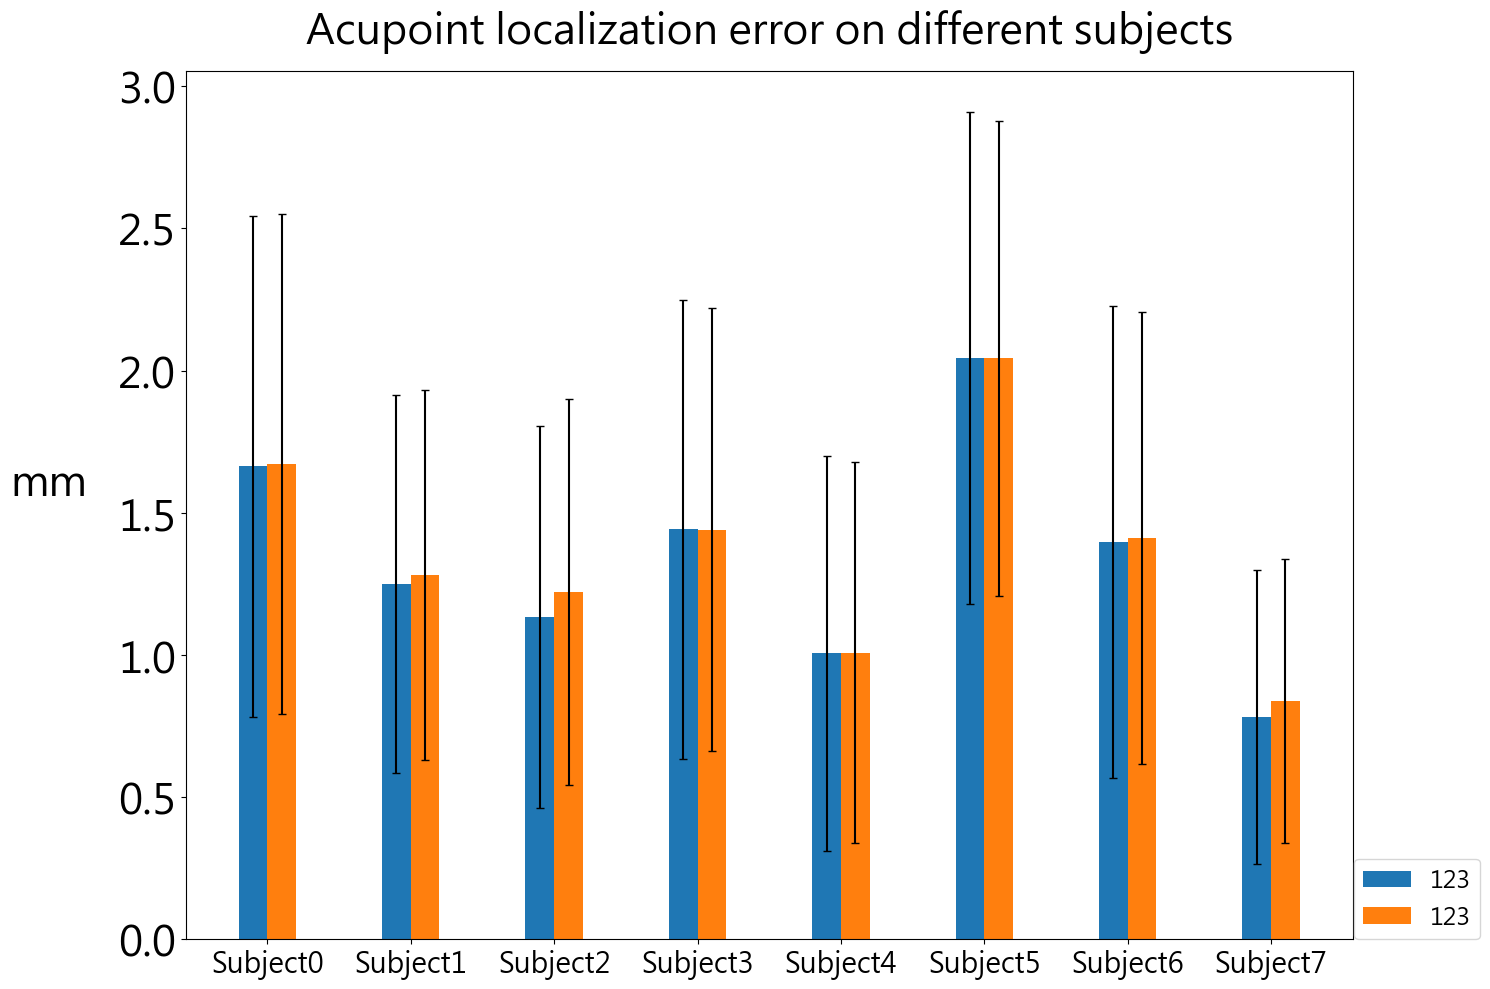

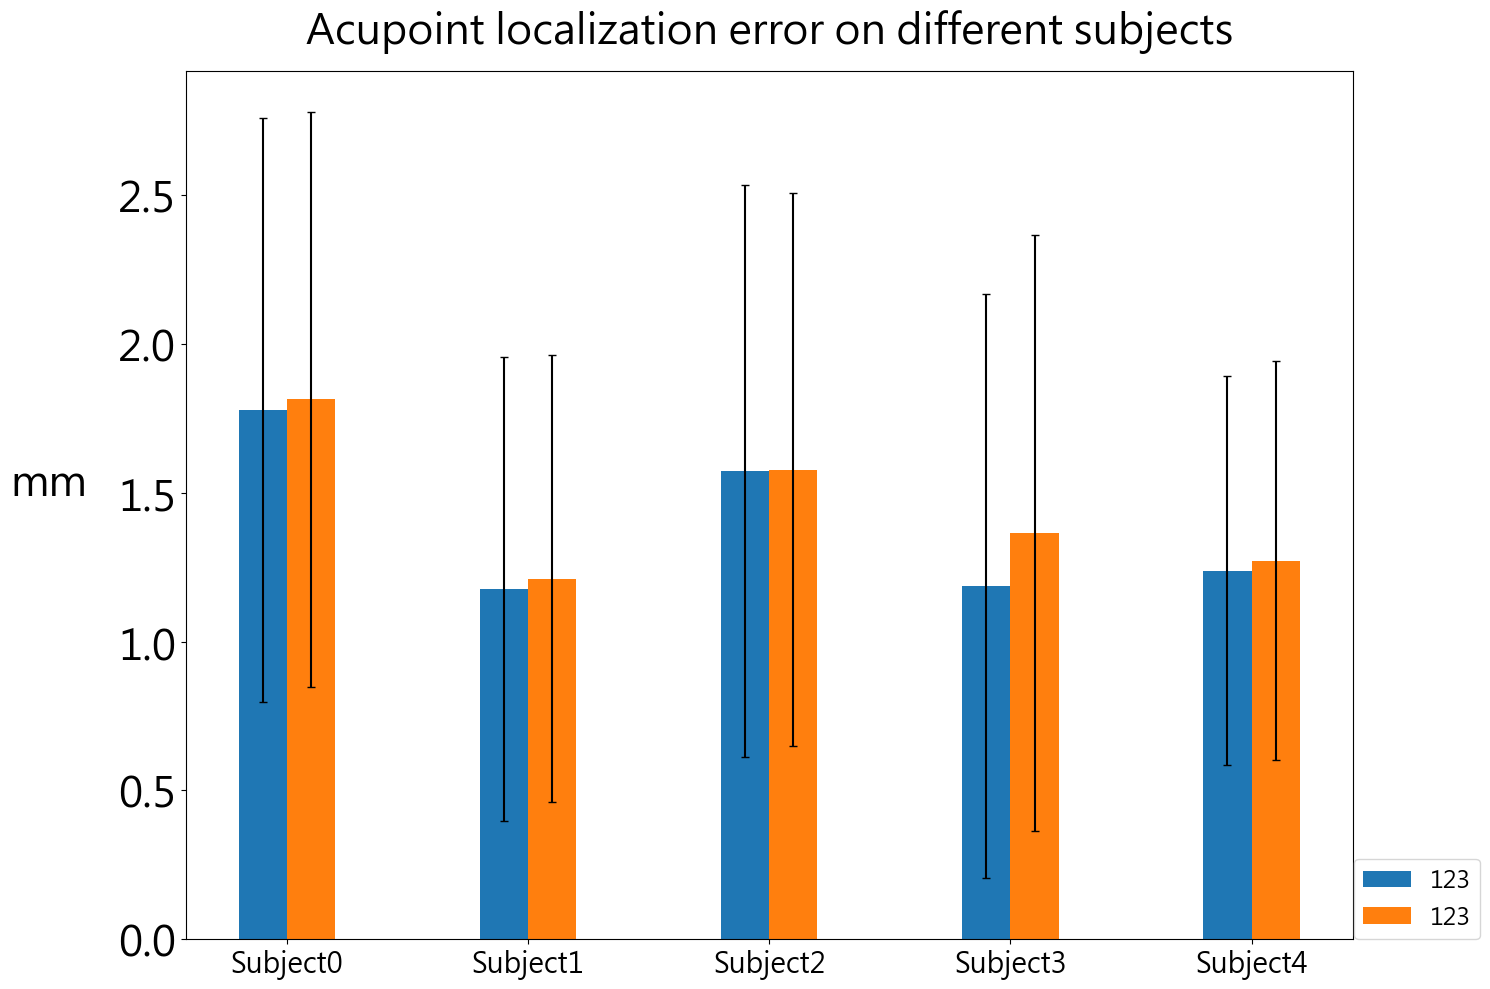

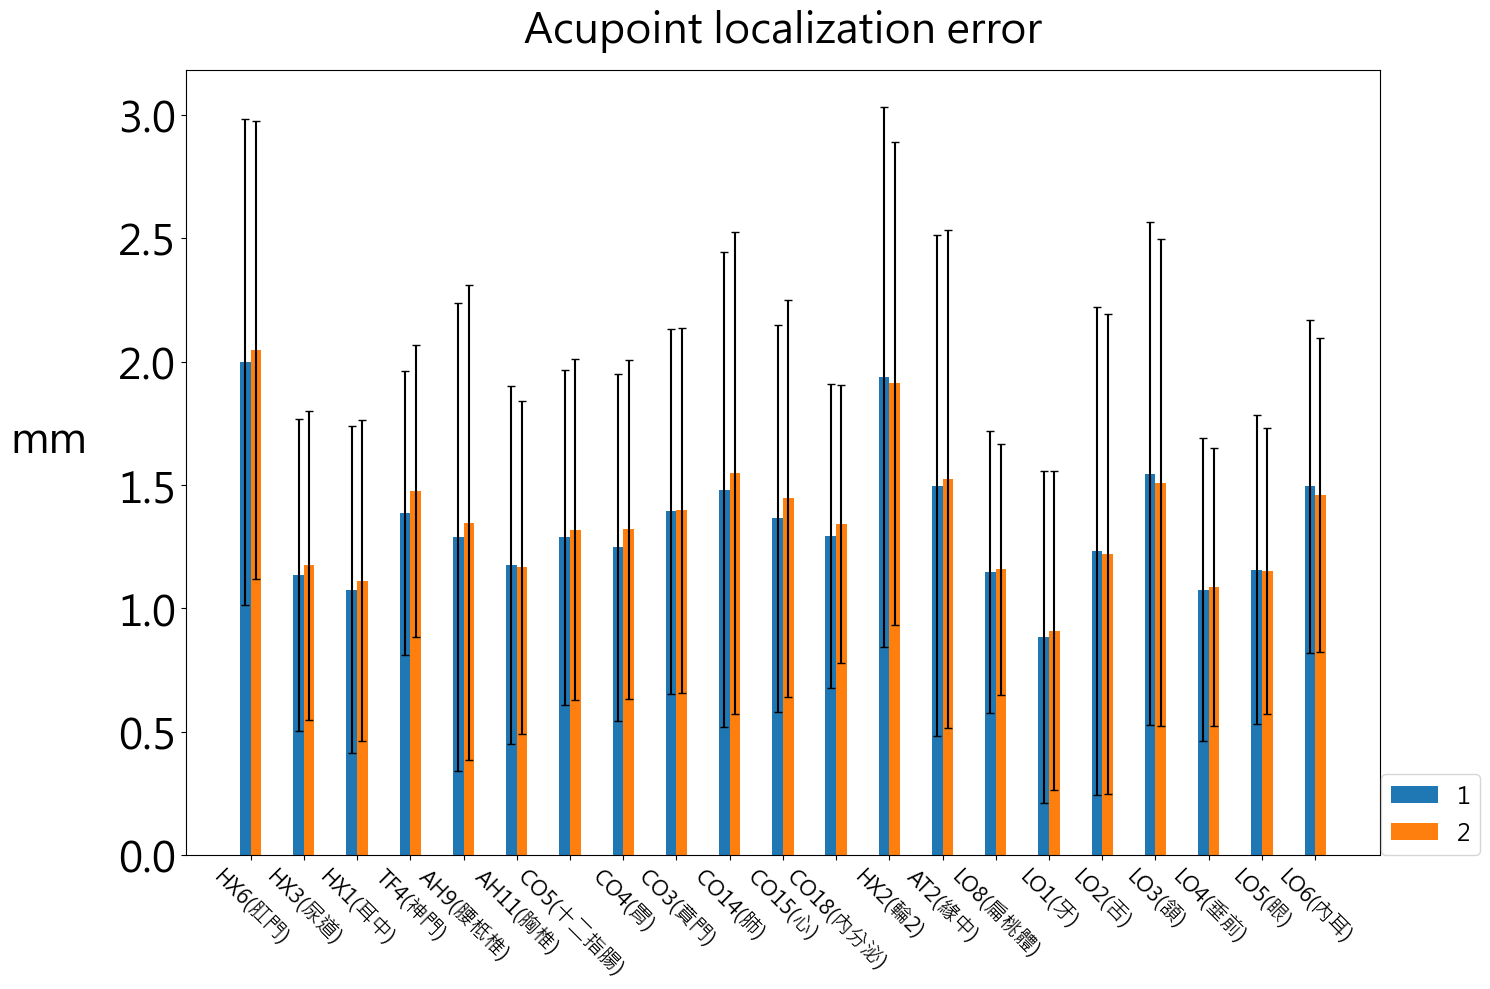

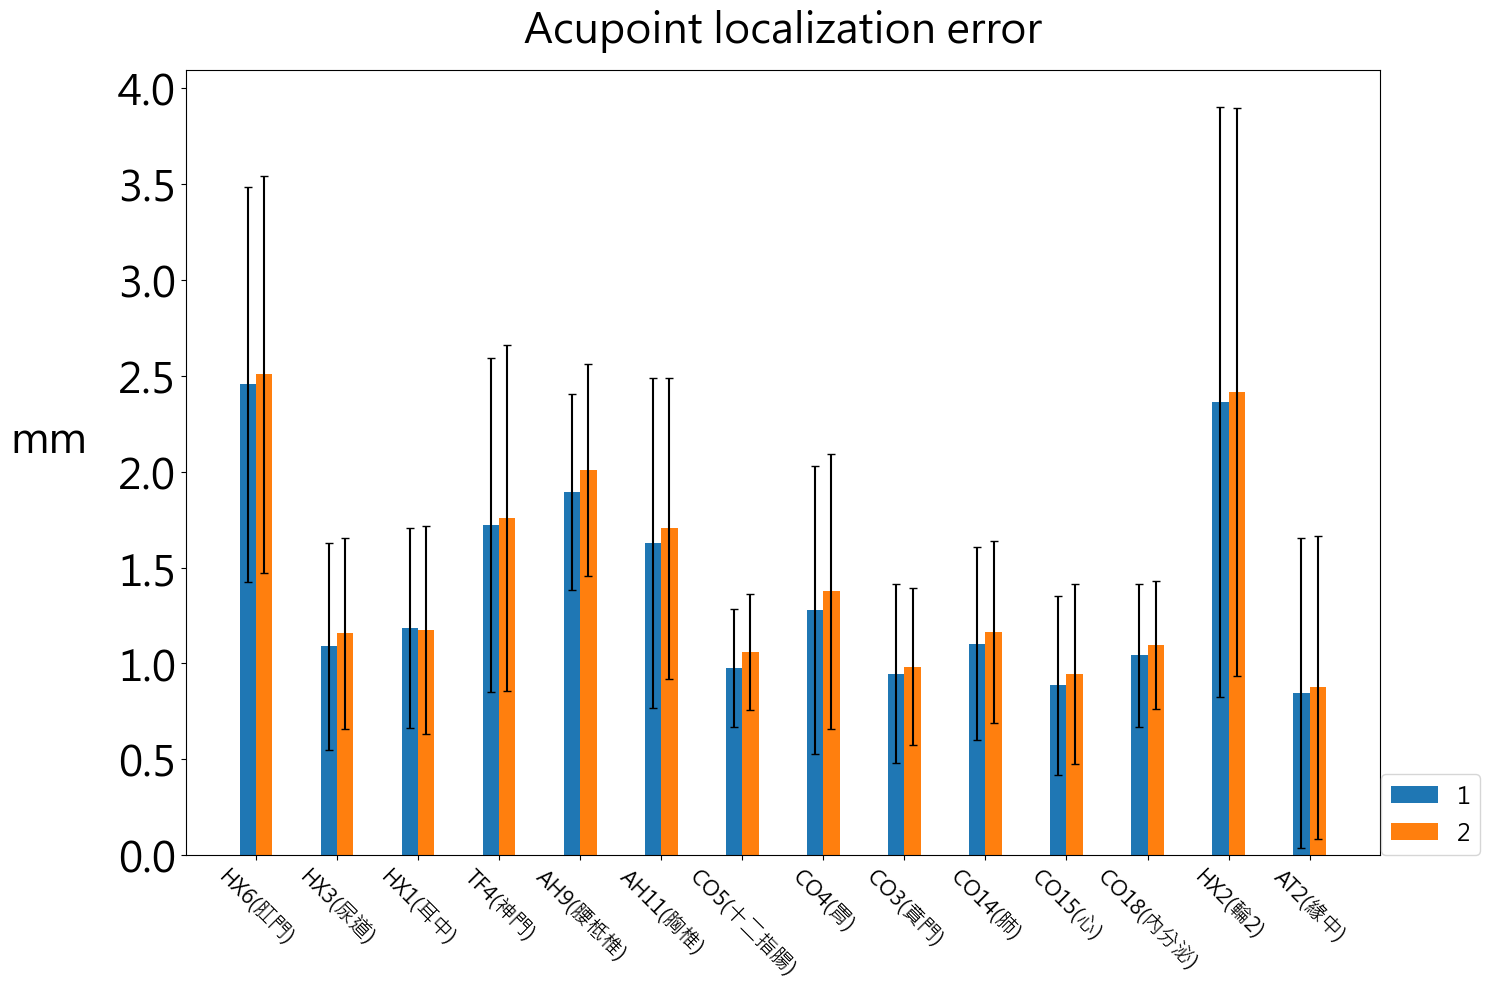

In [29]:
A = occlusion_errors()
B = A.wrap_err_from_csv()
A0 = errors("MAT_inpainting")
B0 = A0.wrap_err_from_csv()
C = plot_fig([B0,B])
C.comparison_bar_fig(["123","123"],"subjects")
C.comparison_bar_fig("123","acupoints")